In [2]:
# importing all the libraries and modules
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [15]:
import seaborn as sns
data = sns.load_dataset("iris")

In [17]:
# viewing the dataset
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

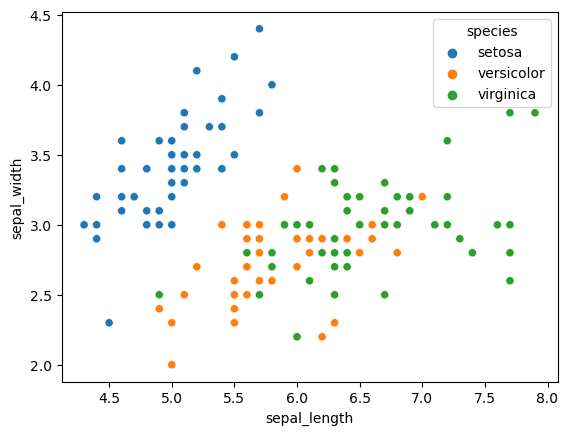

In [20]:
# plotting the dataset
sns.scatterplot(x=data["sepal_length"],y=data["sepal_width"],hue=data["species"])

# Preparing the "iris" dataset for use, we will be using only the first two features

In [3]:
# importing the data set
iris = datasets.load_iris()
X = iris.data[: , :2] # taking only the first two features
y = iris.target

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Using Linear Function Kernel to find a Support Vector Classifier

In [6]:
""" We create an instance of SVM and fit out data.
 We do not scale our data since we want to plot the support vectors
"""
C = 1.0 # SVM regularization parameter
"""
    kernel : 'linear', 'rbf', 'poly' , 'sigmoid'
    C : penalty/cost regularization parameter of the error expression. Controls trade-off between smooth decision boundaries and classifying points correctly
    gamma : Kernel coefficient for 'rbf', 'poly', 'sigmoid'. Higher value of gamma increases bias and results in overfitting (generalization error)
"""
svc_l = svm.SVC(kernel ='linear', C =100, gamma = 0).fit(X,y)

## Using Radial Bias Function Kernel to find a Support Vector Classifier

In [8]:
svc_rbf = svm.SVC(kernel = 'rbf', C = 0.1, gamma = 1).fit(X,y)


## Using Polynomial Function Kernel to find a Support Vector Classifier

In [9]:
svc_poly = svm.SVC(kernel = 'poly', C = 1, gamma = 10).fit(X,y)

In [13]:
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn import datasets


# Create an SVC instance
svc = SVC()

# Define the parameter grid to search over
param_grid = {'C': [0.05,0.08, 0.1, 0.12, 0.2], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.1, 0.3, 0.5, 1, 1.5, 2, 5]}

# Create a KFold cross-validation splitter
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=kf, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameters and corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy: {:.2f}".format(grid_search.best_score_))


Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best accuracy: 0.82


# Creating a standard show() function to display a scatterplot of the SVC

In [11]:
def show(svc,x_min,x_max,y_min,y_max, x_label= 'x1', y_label= 'x2', title = "A Support Vector Classifier with a kernel"):

    """ svc : support vector classifier object/instance
        x_min : minimum value of the x1 feature to follow while plotting
        x_max : maximum value of the x1 feature to follow while plotting
        y_min : minimum value of the x2 feature to follow while plotting
        y_max : maximum value of the x2 feature to follow while plotting
        title : title of the plot
    """
    
    h = (x_max / x_min) / 100
    
    """ meshgrid used to create a rectangular grid out of two given one-dimensional arrays representing 
        the Cartesian indexing or Matrix indexing. """
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max+1.5, h))

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) 
    """ np.ravel returns contiguous flattened array(1D array with all the input-array elements and with the same type as it). 
        A copy is made only if needed. """

    """ np.c_ Translates slice objects to concatenation along the second axis.
        This is short-hand for np.r_['-1,2,0', index expression], which is useful because of its common occurrence.
        In particular, arrays will be stacked along their last axis after being upgraded to 
        at least 2-D with 1s post-pended to the shape (column vectors made out of 1-D arrays). """

    Z =  Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap =plt.cm.Paired, alpha = 0.5)

    plt.scatter(X[:,0], X[:,1], c = y, cmap= plt.cm.Paired) # scatter plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()


# Showing all the scatter plots of the respective SVCs with different kernels

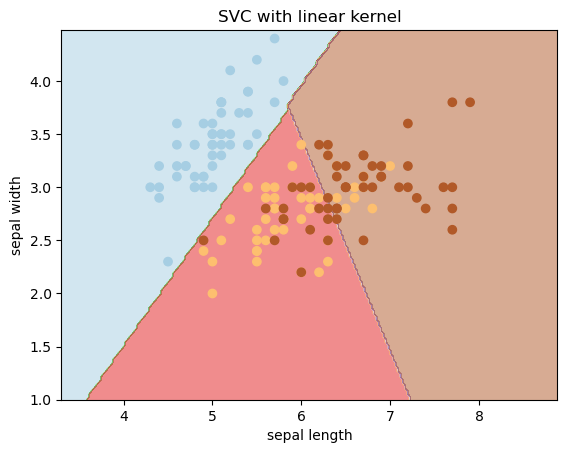

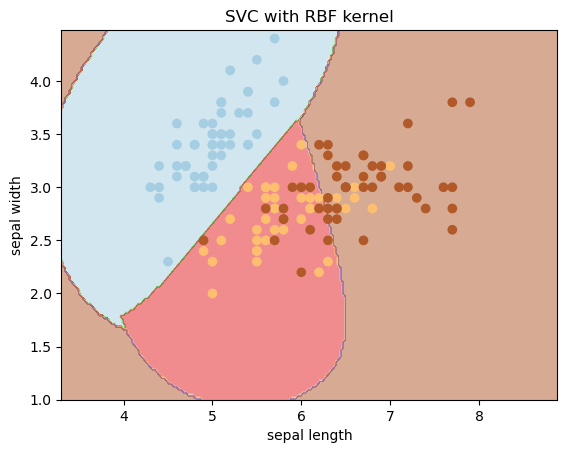

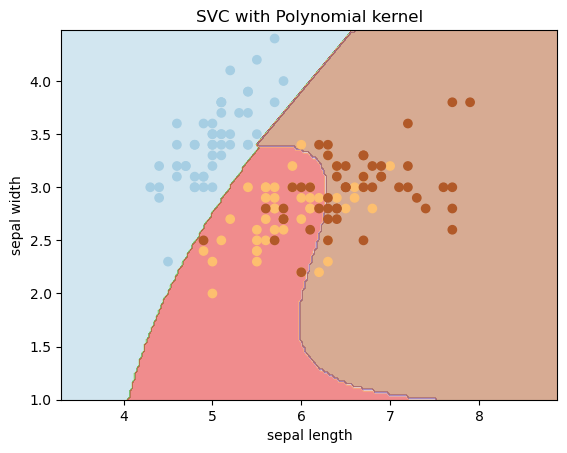

In [12]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].min() + 1


show(svc_l, x_min, x_max, y_min, y_max,"sepal length" , "sepal width", "SVC with linear kernel")
show(svc_rbf, x_min, x_max, y_min, y_max, "sepal length" , "sepal width", "SVC with RBF kernel")
show(svc_poly, x_min, x_max, y_min, y_max, "sepal length" , "sepal width", "SVC with Polynomial kernel")
